In [0]:
from pyspark import *
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *


#Read input csv file

# path = "/FileStore/tables/WA_Fn_UseC__Telco_Customer_Churn.csv"
# df = spark.read.format("csv").option("header","true").option('inferschema','true')\
#   .option("delimiter", ",").option("quote", "\"").option("escape", "\"")\
#     .option("multiline", "true").load(path)

df.display()
df = df.withColumn('TotalCharges',col('TotalCharges').cast(DoubleType()))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.select([count(when(isnan(c) | col(c).isNull(),c )).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 11| 0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+

In [0]:
df.groupBy('Churn').count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 5174|
 Yes| 1869|
+-----+-----+

In [0]:
pd_df = df.toPandas()

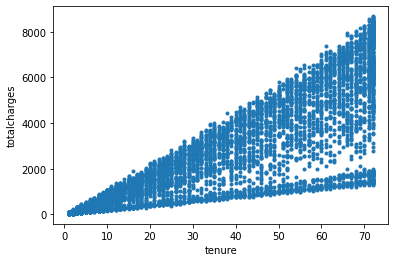

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'], pd_df['TotalCharges'], '.')
plt.xlabel('tenure')
plt.ylabel('totalcharges')
display()



In [0]:
df.select('tenure','Totalcharges','MonthlyCharges').describe().show()

+-------+------------------+------------------+------------------+
summary| tenure| Totalcharges| MonthlyCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7032| 7043|
 mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
 stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
 min| 0| 18.8| 18.25|
 max| 72| 8684.8| 118.75|
+-------+------------------+------------------+------------------+

In [0]:
df.select('SeniorCitizen','churn').groupBy('SeniorCitizen','churn').agg(count(lit(1)).alias("count")).display()

SeniorCitizen,churn,count
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


In [0]:
df.stat.crosstab("SeniorCitizen","InternetService").show()
# df

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
df.stat.freqItems(["PhoneService","MultipleLines","InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"], 0.6).collect()

Out[9]: [Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [0]:
churn_df = df
(train_data , test_data) = churn_df.randomSplit([0.7,0.3], 24)

print("Records for training: " + str(train_data.count()))
print("Records for evaluation: " + str(test_data.count()))

Records for training: 4942
Records for evaluation: 2101

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

catColumns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

In [0]:
stages= []
for catCol in catColumns:
  stringIndexer = StringIndexer(inputCol = catCol, outputCol = catCol + "Index")
  encoder = OneHotEncoder(inputCols = [stringIndexer.getOutputCol()], outputCols = [catCol + "catVec"])
  stages += [stringIndexer,encoder]

In [0]:
stages #index created for each variable - handed the categorical value

Out[13]: [StringIndexer_89a32ac221ed,
 OneHotEncoder_5e9075657362,
 StringIndexer_5bf42b9a3443,
 OneHotEncoder_ffdb3ebb726f,
 StringIndexer_6ac4c45fa2b0,
 OneHotEncoder_3c0161974801,
 StringIndexer_23ec52894602,
 OneHotEncoder_37109a9175da,
 StringIndexer_e145aa5bf016,
 OneHotEncoder_34016cbbc6d5,
 StringIndexer_1e5b2b0dc8d0,
 OneHotEncoder_005161a10e3e,
 StringIndexer_eccaef9d0062,
 OneHotEncoder_ef74d6c1aa49,
 StringIndexer_fff172e61d85,
 OneHotEncoder_58f40a401ced,
 StringIndexer_8c0b5ea132b3,
 OneHotEncoder_15c965e53e35,
 StringIndexer_27b38312b8d5,
 OneHotEncoder_0c579fe275a2,
 StringIndexer_087324bd7442,
 OneHotEncoder_74a0a5395b1b,
 StringIndexer_b26430c6132e,
 OneHotEncoder_dc5b34c98ac4,
 StringIndexer_fe08b0449f53,
 OneHotEncoder_14f2a270a492,
 StringIndexer_9c51fc69e820,
 OneHotEncoder_f08c289c1c05,
 StringIndexer_c468ff246efa,
 OneHotEncoder_67408834ce33,
 StringIndexer_3036c07d2862,
 OneHotEncoder_2b480adb9478]

In [0]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["TotalCharges"], outputCols=["Out_TotalCharges"])
stages += [imputer]

In [0]:
#converting the target column 'churn' to numbers 
label_Idx = StringIndexer(inputCol="Churn",outputCol="label")
stages += [label_Idx]

In [0]:
temp = label_Idx.fit(train_data).transform(train_data)
temp.display()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No,0.0
0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No,0.0
0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,1.0
0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,1.0
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,1.0
0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.4,571.45,No,0.0
0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.7,7904.25,No,0.0
0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.2,340.35,No,0.0
0017-DINOC,Male,0,No,No,54,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Two year,No,Credit card (automatic),45.2,2460.55,No,0.0
0017-IUDMW,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.8,8456.75,No,0.0


In [0]:
df.stat.corr('TotalCharges','MonthlyCharges')
df = df.withColumn('TotalCharges',col('TotalCharges').cast(DoubleType()))
df.stat.corr('TotalCharges','MonthlyCharges')

Out[19]: 0.6511738315787813

In [0]:
#Customers at the later tenure seemed to be churning out more so we are binning the tenure values to 3 different bins
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(numBuckets = 3, inputCol = "tenure", outputCol = "tenure_bin")
stages += [tenure_bin]

In [0]:
stages

Out[21]: [StringIndexer_89a32ac221ed,
 OneHotEncoder_5e9075657362,
 StringIndexer_5bf42b9a3443,
 OneHotEncoder_ffdb3ebb726f,
 StringIndexer_6ac4c45fa2b0,
 OneHotEncoder_3c0161974801,
 StringIndexer_23ec52894602,
 OneHotEncoder_37109a9175da,
 StringIndexer_e145aa5bf016,
 OneHotEncoder_34016cbbc6d5,
 StringIndexer_1e5b2b0dc8d0,
 OneHotEncoder_005161a10e3e,
 StringIndexer_eccaef9d0062,
 OneHotEncoder_ef74d6c1aa49,
 StringIndexer_fff172e61d85,
 OneHotEncoder_58f40a401ced,
 StringIndexer_8c0b5ea132b3,
 OneHotEncoder_15c965e53e35,
 StringIndexer_27b38312b8d5,
 OneHotEncoder_0c579fe275a2,
 StringIndexer_087324bd7442,
 OneHotEncoder_74a0a5395b1b,
 StringIndexer_b26430c6132e,
 OneHotEncoder_dc5b34c98ac4,
 StringIndexer_fe08b0449f53,
 OneHotEncoder_14f2a270a492,
 StringIndexer_9c51fc69e820,
 OneHotEncoder_f08c289c1c05,
 StringIndexer_c468ff246efa,
 OneHotEncoder_67408834ce33,
 StringIndexer_3036c07d2862,
 OneHotEncoder_2b480adb9478,
 Imputer_e8eaacbb59bf,
 StringIndexer_28d27de3439b,
 QuantileDiscretizer_7ae1b4cb64f4]

In [0]:
#take all teh values and create an array (like numpy array) -> input to the model
numericCols = ["tenure_bin", "Out_TotalCharges","MonthlyCharges"]
assembleInputs = assemblerInputs = [c + "catVec" for c in catColumns] + numericCols   #categorical columns + numerical columns
assembler = VectorAssembler(inputCols=assembleInputs, outputCol="features") # passing the above inputs to the vector assembler #output name should be features for all the features and for teh target it should be label
stages += [assembler]

In [0]:
stages

Out[23]: [StringIndexer_89a32ac221ed,
 OneHotEncoder_5e9075657362,
 StringIndexer_5bf42b9a3443,
 OneHotEncoder_ffdb3ebb726f,
 StringIndexer_6ac4c45fa2b0,
 OneHotEncoder_3c0161974801,
 StringIndexer_23ec52894602,
 OneHotEncoder_37109a9175da,
 StringIndexer_e145aa5bf016,
 OneHotEncoder_34016cbbc6d5,
 StringIndexer_1e5b2b0dc8d0,
 OneHotEncoder_005161a10e3e,
 StringIndexer_eccaef9d0062,
 OneHotEncoder_ef74d6c1aa49,
 StringIndexer_fff172e61d85,
 OneHotEncoder_58f40a401ced,
 StringIndexer_8c0b5ea132b3,
 OneHotEncoder_15c965e53e35,
 StringIndexer_27b38312b8d5,
 OneHotEncoder_0c579fe275a2,
 StringIndexer_087324bd7442,
 OneHotEncoder_74a0a5395b1b,
 StringIndexer_b26430c6132e,
 OneHotEncoder_dc5b34c98ac4,
 StringIndexer_fe08b0449f53,
 OneHotEncoder_14f2a270a492,
 StringIndexer_9c51fc69e820,
 OneHotEncoder_f08c289c1c05,
 StringIndexer_c468ff246efa,
 OneHotEncoder_67408834ce33,
 StringIndexer_3036c07d2862,
 OneHotEncoder_2b480adb9478,
 Imputer_e8eaacbb59bf,
 StringIndexer_28d27de3439b,
 QuantileDiscretizer_7ae1b4cb64f4,
 VectorAssembler_58892686ab76]

In [0]:
# pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data) 

In [0]:
# trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[28]: [Row(customerID='0002-ORFBO', gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='Yes', tenure=9, PhoneService='Yes', MultipleLines='No', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='Yes', StreamingTV='Yes', StreamingMovies='No', Contract='One year', PaperlessBilling='Yes', PaymentMethod='Mailed check', MonthlyCharges=65.6, TotalCharges=593.3, Churn='No', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=1.0, PartnercatVec=SparseVector(1, {}), DependentsIndex=1.0, DependentscatVec=SparseVector(1, {}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=1.0, OnlineBackupcatVec=SparseVector(2, {1: 1.0}), DeviceProtectionIndex=0.0, DeviceProtectioncatVec=SparseVector(2, {0: 1.0}), TechSupportIndex=1.0, TechSupportcatVec=SparseVector(2, {1: 1.0}), StreamingTVIndex=1.0, StreamingTVcatVec=SparseVector(2, {1: 1.0}), StreamingMoviesIndex=0.0, StreamingMoviescatVec=SparseVector(2, {0: 1.0}), ContractIndex=2.0, ContractcatVec=SparseVector(2, {}), PaperlessBillingIndex=0.0, PaperlessBillingcatVec=SparseVector(1, {0: 1.0}), PaymentMethodIndex=1.0, PaymentMethodcatVec=SparseVector(3, {1: 1.0}), Out_TotalCharges=593.3, label=0.0, tenure_bin=0.0, features=SparseVector(30, {1: 1.0, 4: 1.0, 5: 1.0, 8: 1.0, 9: 1.0, 12: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 19: 1.0, 23: 1.0, 25: 1.0, 28: 593.3, 29: 65.6}))]

In [0]:
trainprepDF.select("tenure_bin").show()

+----------+
tenure_bin|
+----------+
 0.0|
 0.0|
 0.0|
 0.0|
 0.0|
 0.0|
 2.0|
 0.0|
 2.0|
 2.0|
 0.0|
 2.0|
 1.0|
 0.0|
 1.0|
 0.0|
 0.0|
 0.0|
 2.0|
 2.0|
+----------+
only showing top 20 rows

In [0]:
from pyspark.ml.classification import LogisticRegression

#Create Initial logisticRegressionmodel
lr = LogisticRegression(labelCol = "label",featuresCol="features",maxIter=10)

#train model with training data
lrModel = lr.fit(trainprepDF)

In [0]:
print("Coefficients: " +str(lrModel.coefficients))
print("Intercept: " +str(lrModel.intercept))

Coefficients: [0.03428096117462176,-0.33121628449628626,-0.10403353480848117,0.12868949953120093,-0.6191319066991556,-0.24717797826289087,0.026856518488302523,0.5947672912779566,-0.43247345849078145,0.2603430987936118,-0.07873494378528201,0.1759922587819037,0.025094376876394306,0.13427108880327884,0.07038245227252769,0.24746208612235363,-0.06197277109519486,-0.037427814879673386,0.24498552330495743,0.012591165389667957,0.1928780997457297,0.7074105789470353,-0.8525993844823548,0.2978156771216542,0.33700459962330087,-0.08658398567782494,0.0100020300984617,-0.7221850241280543,-0.00011665000139783263,0.00517932123476872]
Intercept: -1.1540815271668818

In [0]:
summary=lrModel.summary

In [0]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure:  %s\nPrecision:  %s\nRecall:  %s\nAreaUnderROC: %s" % (accuracy,falsePositiveRate,truePositiveRate,fMeasure,precision,recall,summary.areaUnderROC))

Accuracy: 0.8057466612707406
FPR: 0.3625173099768732
TPR: 0.8057466612707406
F-measure: 0.7993759299320431
Precision: 0.7971094940545889
Recall: 0.8057466612707406
AreaUnderROC: 0.8499058928782474

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(testprepDF)
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction")
area_under_curve = evaluatorLR.evaluate(predictions)

print("areaUnderROC = %g" % area_under_curve)

evaluatorLR.getMetricName()

areaUnderROC = 0.704116
Out[34]: 'areaUnderROC'